# Day 1 "Sonar Sweep"

## Part 1

### Problem

You're minding your own business on a ship at sea when the overboard alarm goes off! You rush to see if you can help. Apparently, one of the Elves tripped and accidentally sent the sleigh keys flying into the ocean!

Before you know it, you're inside a submarine the Elves keep ready for situations like this. It's covered in Christmas lights (because of course it is), and it even has an experimental antenna that should be able to track the keys if you can boost its signal strength high enough; there's a little meter that indicates the antenna's signal strength by displaying 0-50 stars.

Your instincts tell you that in order to save Christmas, you'll need to get all fifty stars by December 25th.

Collect stars by solving puzzles. Two puzzles will be made available on each day in the Advent calendar; the second puzzle is unlocked when you complete the first. Each puzzle grants one star. Good luck!

As the submarine drops below the surface of the ocean, it automatically performs a sonar sweep of the nearby sea floor. On a small screen, the sonar sweep report (your puzzle input) appears: each line is a measurement of the sea floor depth as the sweep looks further and further away from the submarine.

For example, suppose you had the following report:

        199
        200
        208
        210
        200
        207
        240
        269
        260
        263

This report indicates that, scanning outward from the submarine, the sonar sweep found depths of 199, 200, 208, 210, and so on.

The first order of business is to figure out how quickly the depth increases, just so you know what you're dealing with - you never know if the keys will get carried into deeper water by an ocean current or a fish or something.

To do this, count the number of times a depth measurement increases from the previous measurement. (There is no measurement before the first measurement.) In the example above, the changes are as follows:

        199 (N/A - no previous measurement)
        200 (increased)
        208 (increased)
        210 (increased)
        200 (decreased)
        207 (increased)
        240 (increased)
        269 (increased)
        260 (decreased)
        263 (increased)

In this example, there are 7 measurements that are larger than the previous measurement.

How many measurements are larger than the previous measurement?

### Setup

Parse and style.

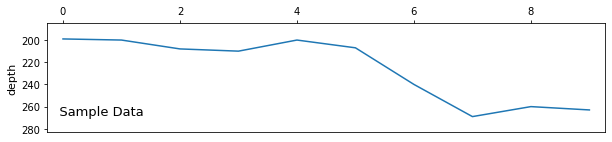

In [1]:
from utils import *

_input = initDay("day1")
_inputData = [int(x) for x in re.findall('\d+', _input)]

_sampleData = [199, 200, 208, 210, 200, 207, 240, 269, 260, 263]

def plot(title, data):
    plotInvertY(.1)
    plt.ylabel("depth")
    plt.title('   ' + title)
    plt.plot(data)

plot('Sample Data', _sampleData)

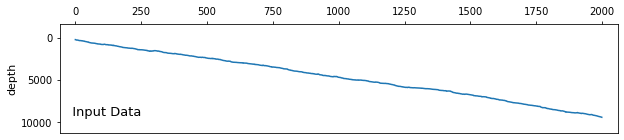

In [2]:
plot('Input Data', _inputData)

### Solver

Part 1 and 2 can use the same solver:

* Walk list of ints
* Sum a moving window of given size
* Count instances where a sum is greater than the previous sum

In [3]:
def solve(depths, window):
    last, count = 0, 0
    for i in range(len(depths) - window):
        s = sum(depths[i:i+window])
        count += 1 if s > last else 0
        last = s
    return count

### Solution

Window size = 1.

In [4]:
def solve1(depths):
    return solve(depths, 1)

check(solve1(_sampleData), 7)
check1(solve1(_inputData))

Part 1 Result: 1681


## Part 2

### Problem

Considering every single measurement isn't as useful as you expected: there's just too much noise in the data.

Instead, consider sums of a three-measurement sliding window. Again considering the above example:

        199  A
        200  A B
        208  A B C
        210    B C D
        200  E   C D
        207  E F   D
        240  E F G
        269    F G H
        260      G H
        263        H

Start by comparing the first and second three-measurement windows. The measurements in the first window are marked A (199, 200, 208); their sum is 199 + 200 + 208 = 607. The second window is marked B (200, 208, 210); its sum is 618. The sum of measurements in the second window is larger than the sum of the first, so this first comparison increased.

Your goal now is to count the number of times the sum of measurements in this sliding window increases from the previous sum. So, compare A with B, then compare B with C, then C with D, and so on. Stop when there aren't enough measurements left to create a new three-measurement sum.

In the above example, the sum of each three-measurement window is as follows:

        A: 607 (N/A - no previous sum)
        B: 618 (increased)
        C: 618 (no change)
        D: 617 (decreased)
        E: 647 (increased)
        F: 716 (increased)
        G: 769 (increased)
        H: 792 (increased)

In this example, there are 5 sums that are larger than the previous sum.

Consider sums of a three-measurement sliding window. How many sums are larger than the previous sum?

### Solution

Window size = 3.

In [5]:
def solve2(depths):
    return solve(depths, 3)

check(solve2(_sampleData), 5)
check2(solve2(_inputData))

Part 2 Result: 1704


# Day 2 "Dive!"

## Part 1

### Problem

Now, you need to figure out how to pilot this thing.

It seems like the submarine can take a series of commands like forward 1, down 2, or up 3:

* forward X increases the horizontal position by X units.
* down X increases the depth by X units.
* up X decreases the depth by X units.

Note that since you're on a submarine, down and up affect your depth, and so they have the opposite result of what you might expect.

The submarine seems to already have a planned course (your puzzle input). You should probably figure out where it's going. For example:

        forward 5
        down 5
        forward 8
        up 3
        down 8
        forward 2

Your horizontal position and depth both start at 0. The steps above would then modify them as follows:

* forward 5 adds 5 to your horizontal position, a total of 5.
* down 5 adds 5 to your depth, resulting in a value of 5.
* forward 8 adds 8 to your horizontal position, a total of 13.
* up 3 decreases your depth by 3, resulting in a value of 2.
* down 8 adds 8 to your depth, resulting in a value of 10.
* forward 2 adds 2 to your horizontal position, a total of 15.

After following these instructions, you would have a horizontal position of 15 and a depth of 10. (Multiplying these together produces 150.)

Calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

### Setup

Parse and style.

In [1]:
from utils import *

_input = initDay("day2")
_inputData = [(m, int(d)) for m, d in re.findall('(\w+) (\d+)', _input)]

_sampleData = [
    ('forward', 5),
    ('down'   , 5),
    ('forward', 8),
    ('up'     , 3),
    ('down'   , 8),
    ('forward', 2)]

plotStyle({'axes.prop_cycle': mpl.cycler('color', ['8dd3c7'])})

def plot(title):
    plotInvertY(.1)
    plt.ylabel("depth")
    plt.title('   ' + title)

### Solution

Algorithm:

* Adjust `x` based on forward movement
* Adjust `y` based on up/down movement
* Return `x*y`

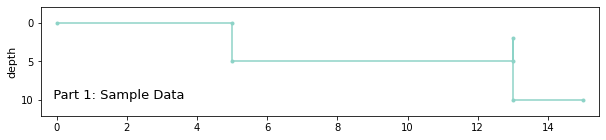

In [2]:
def solve1(moves):
    x, y = [0], [0]
    dx, dy = {'f': 1}, {'d': 1, 'u': -1}

    for move, dist in moves:
        x.append(x[-1] + dx.get(move[0], 0) * dist)
        y.append(y[-1] + dy.get(move[0], 0) * dist)

    plt.plot(x, y, marker='.')
    return x[-1] * y[-1]

check(solve1(_sampleData), 150)
plot('Part 1: Sample Data')

Part 1 Result: 1604850


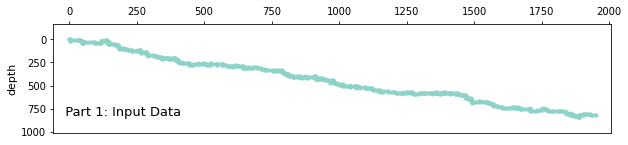

In [3]:
check1(solve1(_inputData))
plot('Part 1: Input Data')

## Part 2

### Problem

Based on your calculations, the planned course doesn't seem to make any sense. You find the submarine manual and discover that the process is actually slightly more complicated.

In addition to horizontal position and depth, you'll also need to track a third value, aim, which also starts at 0. The commands also mean something entirely different than you first thought:

* down X increases your aim by X units.
* up X decreases your aim by X units.
* forward X does two things:
    * It increases your horizontal position by X units.
    * It increases your depth by your aim multiplied by X.

Again note that since you're on a submarine, down and up do the opposite of what you might expect: "down" means aiming in the positive direction.

Now, the above example does something different:

* forward 5 adds 5 to your horizontal position, a total of 5. Because your aim is 0, your depth does not change.
* down 5 adds 5 to your aim, resulting in a value of 5.
* forward 8 adds 8 to your horizontal position, a total of 13. Because your aim is 5, your depth increases by 8*5=40.
* up 3 decreases your aim by 3, resulting in a value of 2.
* down 8 adds 8 to your aim, resulting in a value of 10.
* forward 2 adds 2 to your horizontal position, a total of 15. Because your aim is 10, your depth increases by 2*10=20 to a total of 60.

After following these new instructions, you would have a horizontal position of 15 and a depth of 60. (Multiplying these produces 900.)

Using this new interpretation of the commands, calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

### Solution

Make `aim` responsible for depth changes.

* Adjust `x` based on forward movement
* Adjust `y` based on `aim` during forward movement.
* Adjust `aim` based on up/down movement.
* Return `x*y`

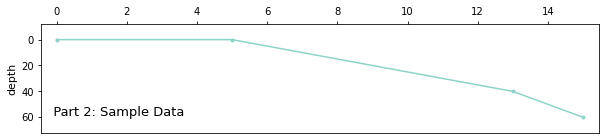

In [4]:
def solve2(moves):
    x, y, a = [0], [0], 0

    for move, dist in moves:
        if move[0] == 'f':
            x.append(x[-1] + dist)
            y.append(y[-1] + a * dist)
        else:
            a += dist if move[0] == 'd' else -dist

    plt.plot(x, y, marker='.')
    return x[-1] * y[-1]

check(solve2(_sampleData), 900)
plot('Part 2: Sample Data')

Part 2 Result: 1685186100


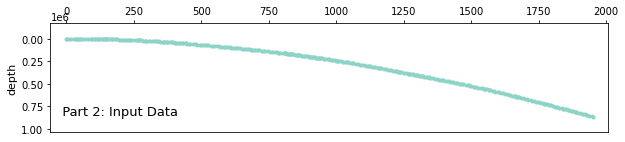

In [5]:
check2(solve2(_inputData))
plot('Part 2: Input Data')

# Day 2 "Dive!"

## Part 1

### Problem

Now, you need to figure out how to pilot this thing.

It seems like the submarine can take a series of commands like forward 1, down 2, or up 3:

* forward X increases the horizontal position by X units.
* down X increases the depth by X units.
* up X decreases the depth by X units.

Note that since you're on a submarine, down and up affect your depth, and so they have the opposite result of what you might expect.

The submarine seems to already have a planned course (your puzzle input). You should probably figure out where it's going. For example:

        forward 5
        down 5
        forward 8
        up 3
        down 8
        forward 2

Your horizontal position and depth both start at 0. The steps above would then modify them as follows:

* forward 5 adds 5 to your horizontal position, a total of 5.
* down 5 adds 5 to your depth, resulting in a value of 5.
* forward 8 adds 8 to your horizontal position, a total of 13.
* up 3 decreases your depth by 3, resulting in a value of 2.
* down 8 adds 8 to your depth, resulting in a value of 10.
* forward 2 adds 2 to your horizontal position, a total of 15.

After following these instructions, you would have a horizontal position of 15 and a depth of 10. (Multiplying these together produces 150.)

Calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

### Setup

Parse and style.

In [1]:
from utils import *

_input = initDay("day2")
_inputData = [(m, int(d)) for m, d in re.findall('(\w+) (\d+)', _input)]

_sampleData = [
    ('forward', 5),
    ('down'   , 5),
    ('forward', 8),
    ('up'     , 3),
    ('down'   , 8),
    ('forward', 2)]

plotStyle({'axes.prop_cycle': mpl.cycler('color', ['8dd3c7'])})

def plot(title):
    plotInvertY(.1)
    plt.ylabel("depth")
    plt.title('   ' + title)

### Solution

Algorithm:

* Adjust `x` based on forward movement
* Adjust `y` based on up/down movement
* Return `x*y`

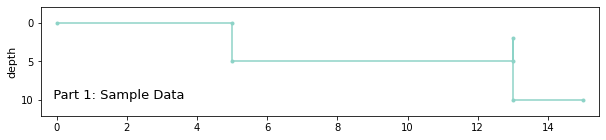

In [2]:
def solve1(moves):
    x, y = [0], [0]
    dx, dy = {'f': 1}, {'d': 1, 'u': -1}

    for move, dist in moves:
        x.append(x[-1] + dx.get(move[0], 0) * dist)
        y.append(y[-1] + dy.get(move[0], 0) * dist)

    plt.plot(x, y, marker='.')
    return x[-1] * y[-1]

check(solve1(_sampleData), 150)
plot('Part 1: Sample Data')

Part 1 Result: 1604850


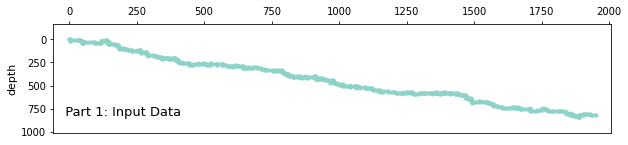

In [3]:
check1(solve1(_inputData))
plot('Part 1: Input Data')

## Part 2

### Problem

Based on your calculations, the planned course doesn't seem to make any sense. You find the submarine manual and discover that the process is actually slightly more complicated.

In addition to horizontal position and depth, you'll also need to track a third value, aim, which also starts at 0. The commands also mean something entirely different than you first thought:

* down X increases your aim by X units.
* up X decreases your aim by X units.
* forward X does two things:
    * It increases your horizontal position by X units.
    * It increases your depth by your aim multiplied by X.

Again note that since you're on a submarine, down and up do the opposite of what you might expect: "down" means aiming in the positive direction.

Now, the above example does something different:

* forward 5 adds 5 to your horizontal position, a total of 5. Because your aim is 0, your depth does not change.
* down 5 adds 5 to your aim, resulting in a value of 5.
* forward 8 adds 8 to your horizontal position, a total of 13. Because your aim is 5, your depth increases by 8*5=40.
* up 3 decreases your aim by 3, resulting in a value of 2.
* down 8 adds 8 to your aim, resulting in a value of 10.
* forward 2 adds 2 to your horizontal position, a total of 15. Because your aim is 10, your depth increases by 2*10=20 to a total of 60.

After following these new instructions, you would have a horizontal position of 15 and a depth of 60. (Multiplying these produces 900.)

Using this new interpretation of the commands, calculate the horizontal position and depth you would have after following the planned course. What do you get if you multiply your final horizontal position by your final depth?

### Solution

Make `aim` responsible for depth changes.

* Adjust `x` based on forward movement
* Adjust `y` based on `aim` during forward movement.
* Adjust `aim` based on up/down movement.
* Return `x*y`

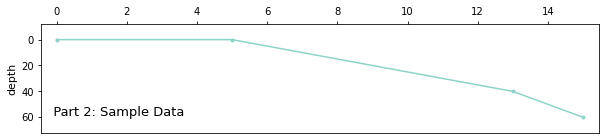

In [4]:
def solve2(moves):
    x, y, a = [0], [0], 0

    for move, dist in moves:
        if move[0] == 'f':
            x.append(x[-1] + dist)
            y.append(y[-1] + a * dist)
        else:
            a += dist if move[0] == 'd' else -dist

    plt.plot(x, y, marker='.')
    return x[-1] * y[-1]

check(solve2(_sampleData), 900)
plot('Part 2: Sample Data')

Part 2 Result: 1685186100


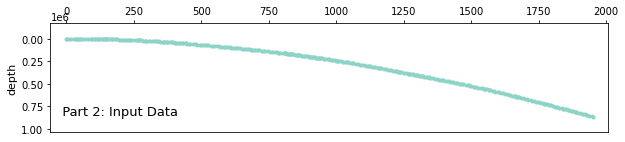

In [5]:
check2(solve2(_inputData))
plot('Part 2: Input Data')

# Day 3 "Binary Diagnostic"

## Part 1

### Problem

The submarine has been making some odd creaking noises, so you ask it to produce a diagnostic report just in case.

The diagnostic report (your puzzle input) consists of a list of binary numbers which, when decoded properly, can tell you many useful things about the conditions of the submarine. The first parameter to check is the power consumption.

You need to use the binary numbers in the diagnostic report to generate two new binary numbers (called the gamma rate and the epsilon rate). The power consumption can then be found by multiplying the gamma rate by the epsilon rate.

Each bit in the gamma rate can be determined by finding the most common bit in the corresponding position of all numbers in the diagnostic report. For example, given the following diagnostic report:

        00100
        11110
        10110
        10111
        10101
        01111
        00111
        11100
        10000
        11001
        00010
        01010

Considering only the first bit of each number, there are five 0 bits and seven 1 bits. Since the most common bit is 1, the first bit of the gamma rate is 1.

The most common second bit of the numbers in the diagnostic report is 0, so the second bit of the gamma rate is 0.

The most common value of the third, fourth, and fifth bits are 1, 1, and 0, respectively, and so the final three bits of the gamma rate are 110.

So, the gamma rate is the binary number 10110, or 22 in decimal.

The epsilon rate is calculated in a similar way; rather than use the most common bit, the least common bit from each position is used. So, the epsilon rate is 01001, or 9 in decimal. Multiplying the gamma rate (22) by the epsilon rate (9) produces the power consumption, 198.

Use the binary numbers in your diagnostic report to calculate the gamma rate and epsilon rate, then multiply them together. What is the power consumption of the submarine? (Be sure to represent your answer in decimal, not binary.)

### Setup

Parse and style.

In [1]:
from utils import *

_input = initDay("day3")
_inputData = [l for l in [l.rstrip() for l in _input.splitlines()] if l]

_sampleData = [
    "00100", "11110", "10110", "10111", "10101", "01111",
    "00111", "11100", "10000", "11001", "00010", "01010"]

### Solution

Algorithm:

* Walk right to left by column (so we can bit shift `gamma`), then each line
* If counted more than half ones, shift in a one to `gamma`
* Derive `epsilon` by inverting `gamma`
* Return `epsilon*gamma`

In [2]:
def solve1(lines):
    gamma = ''
    for col in range(len(lines[0])):
        ones = sum([int(line[col]) for line in lines])
        gamma += '1' if ones > len(lines) / 2 else '0'
    epsilon = ''.join([('0' if int(c) else '1') for c in gamma])
    return int(gamma, 2) * int(epsilon, 2)

check(solve1(_sampleData), 198)
check1(solve1(_inputData))

Part 1 Result: 4160394


## Part 2

### Problem

Next, you should verify the life support rating, which can be determined by multiplying the oxygen generator rating by the CO2 scrubber rating.

Both the oxygen generator rating and the CO2 scrubber rating are values that can be found in your diagnostic report - finding them is the tricky part. Both values are located using a similar process that involves filtering out values until only one remains. Before searching for either rating value, start with the full list of binary numbers from your diagnostic report and consider just the first bit of those numbers. Then:

* Keep only numbers selected by the bit criteria for the type of rating value for which you are searching. Discard numbers which do not * match the bit criteria.
* If you only have one number left, stop; this is the rating value for which you are searching.
* Otherwise, repeat the process, considering the next bit to the right.

The bit criteria depends on which type of rating value you want to find:

* To find oxygen generator rating, determine the most common value (0 or 1) in the current bit position, and keep only numbers with that * bit in that position. If 0 and 1 are equally common, keep values with a 1 in the position being considered.
* To find CO2 scrubber rating, determine the least common value (0 or 1) in the current bit position, and keep only numbers with that bit * in that position. If 0 and 1 are equally common, keep values with a 0 in the position being considered.

For example, to determine the oxygen generator rating value using the same example diagnostic report from above:

* Start with all 12 numbers and consider only the first bit of each number. There are more 1 bits (7) than 0 bits (5), so keep only the 7 numbers with a 1 in the first position: 11110, 10110, 10111, 10101, 11100, 10000, and 11001.
* Then, consider the second bit of the 7 remaining numbers: there are more 0 bits (4) than 1 bits (3), so keep only the 4 numbers with a 0 in the second position: 10110, 10111, 10101, and 10000.
* In the third position, three of the four numbers have a 1, so keep those three: 10110, 10111, and 10101.
* In the fourth position, two of the three numbers have a 1, so keep those two: 10110 and 10111.
* In the fifth position, there are an equal number of 0 bits and 1 bits (one each). So, to find the oxygen generator rating, keep the number with a 1 in that position: 10111.
* As there is only one number left, stop; the oxygen generator rating is 10111, or 23 in decimal.

Then, to determine the CO2 scrubber rating value from the same example above:

* Start again with all 12 numbers and consider only the first bit of each number. There are fewer 0 bits (5) than 1 bits (7), so keep only the 5 numbers with a 0 in the first position: 00100, 01111, 00111, 00010, and 01010.
* Then, consider the second bit of the 5 remaining numbers: there are fewer 1 bits (2) than 0 bits (3), so keep only the 2 numbers with a 1 in the second position: 01111 and 01010.
* In the third position, there are an equal number of 0 bits and 1 bits (one each). So, to find the CO2 scrubber rating, keep the number with a 0 in that position: 01010.
* As there is only one number left, stop; the CO2 scrubber rating is 01010, or 10 in decimal.

Finally, to find the life support rating, multiply the oxygen generator rating (23) by the CO2 scrubber rating (10) to get 230.

Use the binary numbers in your diagnostic report to calculate the oxygen generator rating and CO2 scrubber rating, then multiply them together. What is the life support rating of the submarine? (Be sure to represent your answer in decimal, not binary.)

### Solution

Change to left-to-right and a filtering method.

In [3]:
def solve2(lines):

    def sub(lines, o, z):
        match = ''
        for col in range(len(lines[0])):
            lines = [l for l in lines if l.startswith(match)]
            if len(lines) == 1:
                return lines[0]
            ones = sum(int(l[col]) for l in lines)
            match += str(o) if ones >= len(lines) - ones else str(z)
        return match

    return int(sub(lines, 1, 0), 2) * int(sub(lines, 0, 1), 2)

check(solve2(_sampleData), 230)
check2(solve2(_inputData))

Part 2 Result: 4125600


# Day 3 "Binary Diagnostic"

## Part 1

### Problem

The submarine has been making some odd creaking noises, so you ask it to produce a diagnostic report just in case.

The diagnostic report (your puzzle input) consists of a list of binary numbers which, when decoded properly, can tell you many useful things about the conditions of the submarine. The first parameter to check is the power consumption.

You need to use the binary numbers in the diagnostic report to generate two new binary numbers (called the gamma rate and the epsilon rate). The power consumption can then be found by multiplying the gamma rate by the epsilon rate.

Each bit in the gamma rate can be determined by finding the most common bit in the corresponding position of all numbers in the diagnostic report. For example, given the following diagnostic report:

        00100
        11110
        10110
        10111
        10101
        01111
        00111
        11100
        10000
        11001
        00010
        01010

Considering only the first bit of each number, there are five 0 bits and seven 1 bits. Since the most common bit is 1, the first bit of the gamma rate is 1.

The most common second bit of the numbers in the diagnostic report is 0, so the second bit of the gamma rate is 0.

The most common value of the third, fourth, and fifth bits are 1, 1, and 0, respectively, and so the final three bits of the gamma rate are 110.

So, the gamma rate is the binary number 10110, or 22 in decimal.

The epsilon rate is calculated in a similar way; rather than use the most common bit, the least common bit from each position is used. So, the epsilon rate is 01001, or 9 in decimal. Multiplying the gamma rate (22) by the epsilon rate (9) produces the power consumption, 198.

Use the binary numbers in your diagnostic report to calculate the gamma rate and epsilon rate, then multiply them together. What is the power consumption of the submarine? (Be sure to represent your answer in decimal, not binary.)

### Setup

Parse and style.

In [1]:
from utils import *

_input = initDay("day3")
_inputData = [l for l in [l.rstrip() for l in _input.splitlines()] if l]

_sampleData = [
    "00100", "11110", "10110", "10111", "10101", "01111",
    "00111", "11100", "10000", "11001", "00010", "01010"]

### Solution

Algorithm:

* Walk right to left by column (so we can bit shift `gamma`), then each line
* If counted more than half ones, shift in a one to `gamma`
* Derive `epsilon` by inverting `gamma`
* Return `epsilon*gamma`

In [2]:
def solve1(lines):
    gamma = ''
    for col in range(len(lines[0])):
        ones = sum([int(line[col]) for line in lines])
        gamma += '1' if ones > len(lines) / 2 else '0'
    epsilon = ''.join([('0' if int(c) else '1') for c in gamma])
    return int(gamma, 2) * int(epsilon, 2)

check(solve1(_sampleData), 198)
check1(solve1(_inputData))

Part 1 Result: 4160394


## Part 2

### Problem

Next, you should verify the life support rating, which can be determined by multiplying the oxygen generator rating by the CO2 scrubber rating.

Both the oxygen generator rating and the CO2 scrubber rating are values that can be found in your diagnostic report - finding them is the tricky part. Both values are located using a similar process that involves filtering out values until only one remains. Before searching for either rating value, start with the full list of binary numbers from your diagnostic report and consider just the first bit of those numbers. Then:

* Keep only numbers selected by the bit criteria for the type of rating value for which you are searching. Discard numbers which do not * match the bit criteria.
* If you only have one number left, stop; this is the rating value for which you are searching.
* Otherwise, repeat the process, considering the next bit to the right.

The bit criteria depends on which type of rating value you want to find:

* To find oxygen generator rating, determine the most common value (0 or 1) in the current bit position, and keep only numbers with that * bit in that position. If 0 and 1 are equally common, keep values with a 1 in the position being considered.
* To find CO2 scrubber rating, determine the least common value (0 or 1) in the current bit position, and keep only numbers with that bit * in that position. If 0 and 1 are equally common, keep values with a 0 in the position being considered.

For example, to determine the oxygen generator rating value using the same example diagnostic report from above:

* Start with all 12 numbers and consider only the first bit of each number. There are more 1 bits (7) than 0 bits (5), so keep only the 7 numbers with a 1 in the first position: 11110, 10110, 10111, 10101, 11100, 10000, and 11001.
* Then, consider the second bit of the 7 remaining numbers: there are more 0 bits (4) than 1 bits (3), so keep only the 4 numbers with a 0 in the second position: 10110, 10111, 10101, and 10000.
* In the third position, three of the four numbers have a 1, so keep those three: 10110, 10111, and 10101.
* In the fourth position, two of the three numbers have a 1, so keep those two: 10110 and 10111.
* In the fifth position, there are an equal number of 0 bits and 1 bits (one each). So, to find the oxygen generator rating, keep the number with a 1 in that position: 10111.
* As there is only one number left, stop; the oxygen generator rating is 10111, or 23 in decimal.

Then, to determine the CO2 scrubber rating value from the same example above:

* Start again with all 12 numbers and consider only the first bit of each number. There are fewer 0 bits (5) than 1 bits (7), so keep only the 5 numbers with a 0 in the first position: 00100, 01111, 00111, 00010, and 01010.
* Then, consider the second bit of the 5 remaining numbers: there are fewer 1 bits (2) than 0 bits (3), so keep only the 2 numbers with a 1 in the second position: 01111 and 01010.
* In the third position, there are an equal number of 0 bits and 1 bits (one each). So, to find the CO2 scrubber rating, keep the number with a 0 in that position: 01010.
* As there is only one number left, stop; the CO2 scrubber rating is 01010, or 10 in decimal.

Finally, to find the life support rating, multiply the oxygen generator rating (23) by the CO2 scrubber rating (10) to get 230.

Use the binary numbers in your diagnostic report to calculate the oxygen generator rating and CO2 scrubber rating, then multiply them together. What is the life support rating of the submarine? (Be sure to represent your answer in decimal, not binary.)

### Solution

Change to left-to-right and a filtering method.

In [3]:
def solve2(lines):

    def sub(lines, o, z):
        match = ''
        for col in range(len(lines[0])):
            lines = [l for l in lines if l.startswith(match)]
            if len(lines) == 1:
                return lines[0]
            ones = sum(int(l[col]) for l in lines)
            match += str(o) if ones >= len(lines) - ones else str(z)
        return match

    return int(sub(lines, 1, 0), 2) * int(sub(lines, 0, 1), 2)

check(solve2(_sampleData), 230)
check2(solve2(_inputData))

Part 2 Result: 4125600


# Day 4 "Giant Squid"

## Part 1

### Problem

You're already almost 1.5km (almost a mile) below the surface of the ocean, already so deep that you can't see any sunlight. What you can see, however, is a giant squid that has attached itself to the outside of your submarine.

Maybe it wants to play bingo?

Bingo is played on a set of boards each consisting of a 5x5 grid of numbers. Numbers are chosen at random, and the chosen number is marked on all boards on which it appears. (Numbers may not appear on all boards.) If all numbers in any row or any column of a board are marked, that board wins. (Diagonals don't count.)

The submarine has a bingo subsystem to help passengers (currently, you and the giant squid) pass the time. It automatically generates a random order in which to draw numbers and a random set of boards (your puzzle input). For example:

        7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

        22 13 17 11  0
         8  2 23  4 24
        21  9 14 16  7
         6 10  3 18  5
         1 12 20 15 19

         3 15  0  2 22
         9 18 13 17  5
        19  8  7 25 23
        20 11 10 24  4
        14 21 16 12  6

        14 21 17 24  4
        10 16 15  9 19
        18  8 23 26 20
        22 11 13  6  5
         2  0 12  3  7

After the first five numbers are drawn (7, 4, 9, 5, and 11), there are no winners, but the boards are marked as follows (shown here adjacent to each other to save space):

        22 13 17  *  0         3 15  0  2 22        14 21 17 24  *
         8  2 23  * 24         * 18 13 17  *        10 16 15  * 19
        21  * 14 16  *        19  8  * 25 23        18  8 23 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19        14 21 16 12  6         2  0 12  3  *

After the next six numbers are drawn (17, 23, 2, 0, 14, and 21), there are still no winners:

        22 13  *  *  *         3 15  *  * 22         *  *  * 24  *
         8  *  *  * 24         * 18 13  *  *        10 16 15  * 19
         *  *  * 16  *        19  8  * 25  *        18  8  * 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19         *  * 16 12  6         *  * 12  3  *

Finally, 24 is drawn:

        22 13  *  *  *         3 15  *  * 22         *  *  *  *  *
         8  *  *  * 24         * 18 13  *  *        10 16 15  * 19
         *  *  * 16  *        19  8  * 25  *        18  8  * 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19         *  * 16 12  6         *  * 12  3  *

At this point, the third board wins because it has at least one complete row or column of marked numbers (in this case, the entire top row is marked: 14 21 17 24 4).

The score of the winning board can now be calculated. Start by finding the sum of all unmarked numbers on that board; in this case, the sum is 188. Then, multiply that sum by the number that was just called when the board won, 24, to get the final score, 188 * 24 = 4512.

To guarantee victory against the giant squid, figure out which board will win first. What will your final score be if you choose that board?

### Setup

For the board state, keeping it simple and stupid:

* The boards are kept as a flat array of strings
* Access using striding and offsets
* Convert to ints only for the board score.
* Used slots are marked with `*`.

We start with basic functions to parse, dump, and query the boards, given this data model.

In [1]:
from utils import *

_input = initDay("day4")

_sample = '''
    7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

    22 13 17 11  0
     8  2 23  4 24
    21  9 14 16  7
     6 10  3 18  5
     1 12 20 15 19

     3 15  0  2 22
     9 18 13 17  5
    19  8  7 25 23
    20 11 10 24  4
    14 21 16 12  6

    14 21 17 24  4
    10 16 15  9 19
    18  8 23 26 20
    22 11 13  6  5
     2  0 12  3  7
'''

def getCell(boards, b, x, y):
    return boards[b*25 + y*5 + x]

def dumpBoards(boards):
    bc = len(boards)//25
    for b in range(math.ceil(bc/3)):
        for y in range(5):
            for i in range(3):
                if b+i < bc:
                    for x in range(5):
                        cell = getCell(boards, b+i, x, y)
                        print(f'{cell:>2}', end=(' '))
                    print('   ', end='')
            print()
        print()

def parseItems(text):
    return [v for v in re.findall('\d+', text)] 

def parse(text):
    lines = [l for l in text.splitlines() if l]
    return parseItems(lines[0]), parseItems(' '.join(lines[1:]))

### Solution

Basic flow for each move:

* Replace slots matching the move with `*`.
* Check all boards for any fully-used rows or columns.
* If we want the first winning board, calculate its score and return it.
* Otherwise, remove the board and keep going until we're on the last board, then return its score instead.

In [2]:
def solve(text, takeFirst):

    offsets = list(itertools.chain(*[
        [[y*5+x for x in range(5)] for y in range(5)], # horiz
        [[y*5+x for y in range(5)] for x in range(5)]  # vert
    ]))

    moves, boards = parse(text)

    for move in moves:
        boards = ['*' if c == move else c for c in boards]
        remove = []

        for board in range(boardCount := len(boards)//25):
            for group in offsets:
                if sum([boards[board*25+o] == '*' for o in group]) == 5:
                    if takeFirst or boardCount == 1:
                        total = 0
                        for xy in [(x, y) for y in range(5) for x in range(5)]:
                            if (c := getCell(boards, board, xy[0], xy[1])) != '*':
                                total += int(c)
                        return total * int(move)
                    remove.append(board)

        for board in reversed(remove):
            boards = boards[:board*25]+boards[(board+1)*25:]

def solve1(text):
    return solve(text, True)

check(solve1(_sample), 4512)
check1(solve1(_input))

Part 1 Result: 69579


## Part 2

### Problem

On the other hand, it might be wise to try a different strategy: let the giant squid win.

You aren't sure how many bingo boards a giant squid could play at once, so rather than waste time counting its arms, the safe thing to do is to figure out which board will win last and choose that one. That way, no matter which boards it picks, it will win for sure.

In the above example, the second board is the last to win, which happens after 13 is eventually called and its middle column is completely marked. If you were to keep playing until this point, the second board would have a sum of unmarked numbers equal to 148 for a final score of 148 * 13 = 1924.

Figure out which board will win last. Once it wins, what would its final score be?

### Solution

Call generalized solution, telling it not to take the first winning board.

In [3]:
def solve2(text):
    return solve(text, False)

check(solve2(_sample), 1924)
check2(solve2(_input))

Part 2 Result: 14877


# Day 4 "Giant Squid"

## Part 1

### Problem

You're already almost 1.5km (almost a mile) below the surface of the ocean, already so deep that you can't see any sunlight. What you can see, however, is a giant squid that has attached itself to the outside of your submarine.

Maybe it wants to play bingo?

Bingo is played on a set of boards each consisting of a 5x5 grid of numbers. Numbers are chosen at random, and the chosen number is marked on all boards on which it appears. (Numbers may not appear on all boards.) If all numbers in any row or any column of a board are marked, that board wins. (Diagonals don't count.)

The submarine has a bingo subsystem to help passengers (currently, you and the giant squid) pass the time. It automatically generates a random order in which to draw numbers and a random set of boards (your puzzle input). For example:

        7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

        22 13 17 11  0
         8  2 23  4 24
        21  9 14 16  7
         6 10  3 18  5
         1 12 20 15 19

         3 15  0  2 22
         9 18 13 17  5
        19  8  7 25 23
        20 11 10 24  4
        14 21 16 12  6

        14 21 17 24  4
        10 16 15  9 19
        18  8 23 26 20
        22 11 13  6  5
         2  0 12  3  7

After the first five numbers are drawn (7, 4, 9, 5, and 11), there are no winners, but the boards are marked as follows (shown here adjacent to each other to save space):

        22 13 17  *  0         3 15  0  2 22        14 21 17 24  *
         8  2 23  * 24         * 18 13 17  *        10 16 15  * 19
        21  * 14 16  *        19  8  * 25 23        18  8 23 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19        14 21 16 12  6         2  0 12  3  *

After the next six numbers are drawn (17, 23, 2, 0, 14, and 21), there are still no winners:

        22 13  *  *  *         3 15  *  * 22         *  *  * 24  *
         8  *  *  * 24         * 18 13  *  *        10 16 15  * 19
         *  *  * 16  *        19  8  * 25  *        18  8  * 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19         *  * 16 12  6         *  * 12  3  *

Finally, 24 is drawn:

        22 13  *  *  *         3 15  *  * 22         *  *  *  *  *
         8  *  *  * 24         * 18 13  *  *        10 16 15  * 19
         *  *  * 16  *        19  8  * 25  *        18  8  * 26 20
         6 10  3 18  *        20  * 10 24  *        22  * 13  6  *
         1 12 20 15 19         *  * 16 12  6         *  * 12  3  *

At this point, the third board wins because it has at least one complete row or column of marked numbers (in this case, the entire top row is marked: 14 21 17 24 4).

The score of the winning board can now be calculated. Start by finding the sum of all unmarked numbers on that board; in this case, the sum is 188. Then, multiply that sum by the number that was just called when the board won, 24, to get the final score, 188 * 24 = 4512.

To guarantee victory against the giant squid, figure out which board will win first. What will your final score be if you choose that board?

### Setup

For the board state, keeping it simple and stupid:

* The boards are kept as a flat array of strings
* Access using striding and offsets
* Convert to ints only for the board score.
* Used slots are marked with `*`.

We start with basic functions to parse, dump, and query the boards, given this data model.

In [1]:
from utils import *

_input = initDay("day4")

_sample = '''
    7,4,9,5,11,17,23,2,0,14,21,24,10,16,13,6,15,25,12,22,18,20,8,19,3,26,1

    22 13 17 11  0
     8  2 23  4 24
    21  9 14 16  7
     6 10  3 18  5
     1 12 20 15 19

     3 15  0  2 22
     9 18 13 17  5
    19  8  7 25 23
    20 11 10 24  4
    14 21 16 12  6

    14 21 17 24  4
    10 16 15  9 19
    18  8 23 26 20
    22 11 13  6  5
     2  0 12  3  7
'''

def getCell(boards, b, x, y):
    return boards[b*25 + y*5 + x]

def dumpBoards(boards):
    bc = len(boards)//25
    for b in range(math.ceil(bc/3)):
        for y in range(5):
            for i in range(3):
                if b+i < bc:
                    for x in range(5):
                        cell = getCell(boards, b+i, x, y)
                        print(f'{cell:>2}', end=(' '))
                    print('   ', end='')
            print()
        print()

def parseItems(text):
    return [v for v in re.findall('\d+', text)] 

def parse(text):
    lines = [l for l in text.splitlines() if l]
    return parseItems(lines[0]), parseItems(' '.join(lines[1:]))

### Solution

Basic flow for each move:

* Replace slots matching the move with `*`.
* Check all boards for any fully-used rows or columns.
* If we want the first winning board, calculate its score and return it.
* Otherwise, remove the board and keep going until we're on the last board, then return its score instead.

In [2]:
def solve(text, takeFirst):

    offsets = list(itertools.chain(*[
        [[y*5+x for x in range(5)] for y in range(5)], # horiz
        [[y*5+x for y in range(5)] for x in range(5)]  # vert
    ]))

    moves, boards = parse(text)

    for move in moves:
        boards = ['*' if c == move else c for c in boards]
        remove = []

        for board in range(boardCount := len(boards)//25):
            for group in offsets:
                if sum([boards[board*25+o] == '*' for o in group]) == 5:
                    if takeFirst or boardCount == 1:
                        total = 0
                        for xy in [(x, y) for y in range(5) for x in range(5)]:
                            if (c := getCell(boards, board, xy[0], xy[1])) != '*':
                                total += int(c)
                        return total * int(move)
                    remove.append(board)

        for board in reversed(remove):
            boards = boards[:board*25]+boards[(board+1)*25:]

def solve1(text):
    return solve(text, True)

check(solve1(_sample), 4512)
check1(solve1(_input))

Part 1 Result: 69579


## Part 2

### Problem

On the other hand, it might be wise to try a different strategy: let the giant squid win.

You aren't sure how many bingo boards a giant squid could play at once, so rather than waste time counting its arms, the safe thing to do is to figure out which board will win last and choose that one. That way, no matter which boards it picks, it will win for sure.

In the above example, the second board is the last to win, which happens after 13 is eventually called and its middle column is completely marked. If you were to keep playing until this point, the second board would have a sum of unmarked numbers equal to 148 for a final score of 148 * 13 = 1924.

Figure out which board will win last. Once it wins, what would its final score be?

### Solution

Call generalized solution, telling it not to take the first winning board.

In [3]:
def solve2(text):
    return solve(text, False)

check(solve2(_sample), 1924)
check2(solve2(_input))

Part 2 Result: 14877


# Day 5 "Hydrothermal Venture"

## Part 1

### Problem

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:

        0,9 -> 5,9
        8,0 -> 0,8
        9,4 -> 3,4
        2,2 -> 2,1
        7,0 -> 7,4
        6,4 -> 2,0
        0,9 -> 2,9
        3,4 -> 1,4
        0,0 -> 8,8
        5,5 -> 8,2

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

* An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
* An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:

        .......1..
        ..1....1..
        ..1....1..
        .......1..
        .112111211
        ..........
        ..........
        ..........
        ..........
        222111....

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

### Setup

Parse and style. Data model is a simple array.

In [1]:
from utils import *

_sample = '''
    0,9 -> 5,9
    8,0 -> 0,8
    9,4 -> 3,4
    2,2 -> 2,1
    7,0 -> 7,4
    6,4 -> 2,0
    0,9 -> 2,9
    3,4 -> 1,4
    0,0 -> 8,8
    5,5 -> 8,2'''

_input = initDay("day5")

plotStyle({
    'axes.prop_cycle': mpl.cycler('color', ['8dd3c7']),
    'axes.titlelocation': 'center',
})

class Board:
    def __init__(self, text):
        nums = [int(v) for v in re.findall('\d+', text)]
        self.cx, self.cy = max(nums[::2])+1, max(nums[1::2])+1
        self.grid = [0] * self.cx*self.cy
        self.lines = [v for v in zip(*[iter(nums)]*4)]

    def dump(self):
        for off in range(0, len(self.grid), self.cx):
            row = self.grid[off:off+self.cx]
            print(''.join([str(v) if v != 0 else '.' for v in row]))

    def get(self, x, y):
        return self.grid[y*self.cx+x]

    def plot(self, diags, title):
        plt.figure(figsize = (9,9) if len(self.lines) > 10 else (4,4))
        plt.gca().axes.set_xlim([0, self.cx])
        plt.gca().axes.set_ylim([0, self.cy])
        plt.title('   ' + title)
        plotInvertY(-.08)

        markers = [[] for _ in range(4)]
        for x, y in [(x, y) for y in range(self.cy) for x in range(self.cx)]:
            if (c := self.get(x, y)) >= 2:
                markers[c-2].append((x, y))

        colors = ['green', 'orange', 'yellow', 'white']
        for i, marker in enumerate(markers):
            if len(marker) != 0:
                plt.scatter([v[0] for v in marker], [v[1] for v in marker], s=(i+1)*15, c=colors[i])

### Solution

Not much to do here. For each line, walk from start to end and increment cells for each point visited. Count and return the number of cells visited more than once. Diagonals are skipped in Part 1.

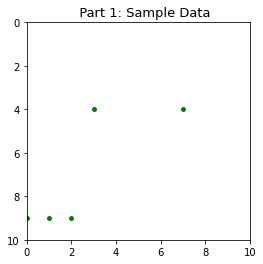

In [2]:
def solve(board, diags):
    for x, y, x2, y2 in board.lines:
        dx = (1 if x2 > x else -1) if x != x2 else 0
        dy = (1 if y2 > y else -1) if y != y2 else 0
        if diags or dx == 0 or dy == 0:
            while (x, y) != (x2+dx, y2+dy):
                board.grid[board.cx*y+x] += 1
                x, y = x+dx, y+dy
    return sum([1 if c > 1 else 0 for c in board.grid])

def solve1(board):
    return solve(board, False)

check(solve1(sampleBoard1 := Board(_sample)), 5)
sampleBoard1.plot(False, "Part 1: Sample Data")

Part 1 Result: 5774


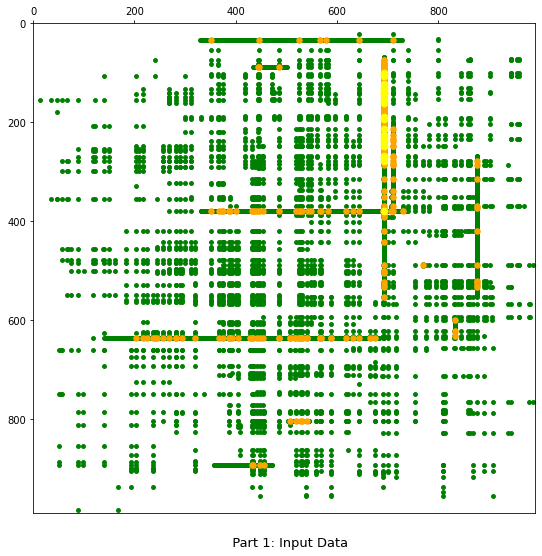

In [3]:
check1(solve1(inputBoard1 := Board(_input)))
inputBoard1.plot(True, "Part 1: Input Data")

## Part 2

### Problem

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

* An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
* An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.

Considering all lines from the above example would now produce the following diagram:

        1.1....11.
        .111...2..
        ..2.1.111.
        ...1.2.2..
        .112313211
        ...1.2....
        ..1...1...
        .1.....1..
        1.......1.
        222111....

You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?

### Solution

Here we simply allow diagonals in the general solution.

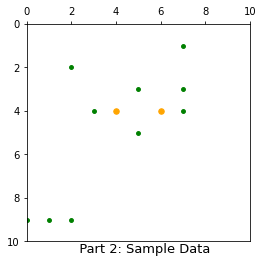

In [4]:
def solve2(board):
    return solve(board, True)

check(solve2(sampleBoard2 := Board(_sample)), 12)
sampleBoard2.plot(False, "Part 2: Sample Data")

Part 2 Result: 18423


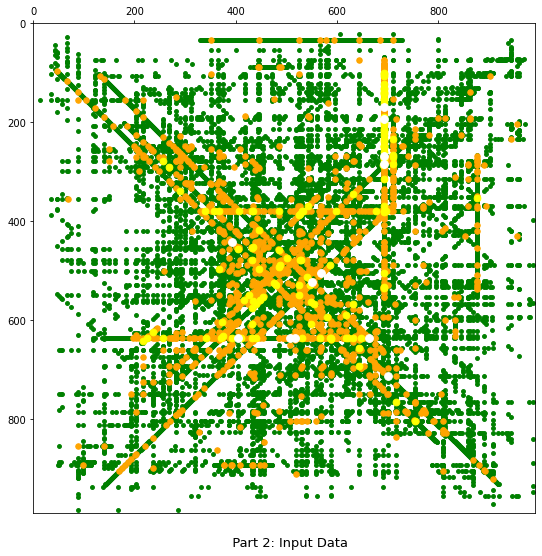

In [5]:
check2(solve2(inputBoard2 := Board(_input)))
inputBoard2.plot(True, "Part 2: Input Data")

# Day 5 "Hydrothermal Venture"

## Part 1

### Problem

You come across a field of hydrothermal vents on the ocean floor! These vents constantly produce large, opaque clouds, so it would be best to avoid them if possible.

They tend to form in lines; the submarine helpfully produces a list of nearby lines of vents (your puzzle input) for you to review. For example:

        0,9 -> 5,9
        8,0 -> 0,8
        9,4 -> 3,4
        2,2 -> 2,1
        7,0 -> 7,4
        6,4 -> 2,0
        0,9 -> 2,9
        3,4 -> 1,4
        0,0 -> 8,8
        5,5 -> 8,2

Each line of vents is given as a line segment in the format x1,y1 -> x2,y2 where x1,y1 are the coordinates of one end the line segment and x2,y2 are the coordinates of the other end. These line segments include the points at both ends. In other words:

* An entry like 1,1 -> 1,3 covers points 1,1, 1,2, and 1,3.
* An entry like 9,7 -> 7,7 covers points 9,7, 8,7, and 7,7.

For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

So, the horizontal and vertical lines from the above list would produce the following diagram:

        .......1..
        ..1....1..
        ..1....1..
        .......1..
        .112111211
        ..........
        ..........
        ..........
        ..........
        222111....

In this diagram, the top left corner is 0,0 and the bottom right corner is 9,9. Each position is shown as the number of lines which cover that point or . if no line covers that point. The top-left pair of 1s, for example, comes from 2,2 -> 2,1; the very bottom row is formed by the overlapping lines 0,9 -> 5,9 and 0,9 -> 2,9.

To avoid the most dangerous areas, you need to determine the number of points where at least two lines overlap. In the above example, this is anywhere in the diagram with a 2 or larger - a total of 5 points.

Consider only horizontal and vertical lines. At how many points do at least two lines overlap?

### Setup

Parse and style. Data model is a simple array.

In [1]:
from utils import *

_sample = '''
    0,9 -> 5,9
    8,0 -> 0,8
    9,4 -> 3,4
    2,2 -> 2,1
    7,0 -> 7,4
    6,4 -> 2,0
    0,9 -> 2,9
    3,4 -> 1,4
    0,0 -> 8,8
    5,5 -> 8,2'''

_input = initDay("day5")

plotStyle({
    'axes.prop_cycle': mpl.cycler('color', ['8dd3c7']),
    'axes.titlelocation': 'center',
})

class Board:
    def __init__(self, text):
        nums = [int(v) for v in re.findall('\d+', text)]
        self.cx, self.cy = max(nums[::2])+1, max(nums[1::2])+1
        self.grid = [0] * self.cx*self.cy
        self.lines = [v for v in zip(*[iter(nums)]*4)]

    def dump(self):
        for off in range(0, len(self.grid), self.cx):
            row = self.grid[off:off+self.cx]
            print(''.join([str(v) if v != 0 else '.' for v in row]))

    def get(self, x, y):
        return self.grid[y*self.cx+x]

    def plot(self, diags, title):
        plt.figure(figsize = (9,9) if len(self.lines) > 10 else (4,4))
        plt.gca().axes.set_xlim([0, self.cx])
        plt.gca().axes.set_ylim([0, self.cy])
        plt.title('   ' + title)
        plotInvertY(-.08)

        markers = [[] for _ in range(4)]
        for x, y in [(x, y) for y in range(self.cy) for x in range(self.cx)]:
            if (c := self.get(x, y)) >= 2:
                markers[c-2].append((x, y))

        colors = ['green', 'orange', 'yellow', 'white']
        for i, marker in enumerate(markers):
            if len(marker) != 0:
                plt.scatter([v[0] for v in marker], [v[1] for v in marker], s=(i+1)*15, c=colors[i])

### Solution

Not much to do here. For each line, walk from start to end and increment cells for each point visited. Count and return the number of cells visited more than once. Diagonals are skipped in Part 1.

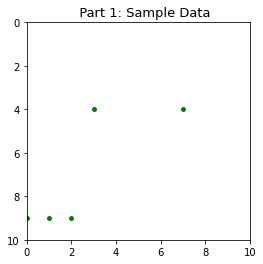

In [2]:
def solve(board, diags):
    for x, y, x2, y2 in board.lines:
        dx = (1 if x2 > x else -1) if x != x2 else 0
        dy = (1 if y2 > y else -1) if y != y2 else 0
        if diags or dx == 0 or dy == 0:
            while (x, y) != (x2+dx, y2+dy):
                board.grid[board.cx*y+x] += 1
                x, y = x+dx, y+dy
    return sum([1 if c > 1 else 0 for c in board.grid])

def solve1(board):
    return solve(board, False)

check(solve1(sampleBoard1 := Board(_sample)), 5)
sampleBoard1.plot(False, "Part 1: Sample Data")

Part 1 Result: 5774


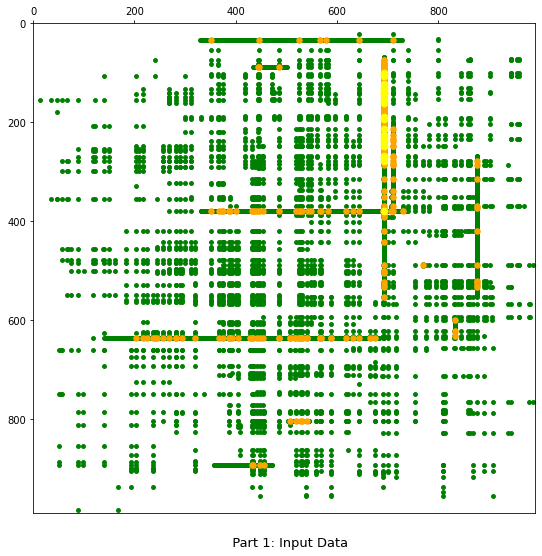

In [3]:
check1(solve1(inputBoard1 := Board(_input)))
inputBoard1.plot(True, "Part 1: Input Data")

## Part 2

### Problem

Unfortunately, considering only horizontal and vertical lines doesn't give you the full picture; you need to also consider diagonal lines.

Because of the limits of the hydrothermal vent mapping system, the lines in your list will only ever be horizontal, vertical, or a diagonal line at exactly 45 degrees. In other words:

* An entry like 1,1 -> 3,3 covers points 1,1, 2,2, and 3,3.
* An entry like 9,7 -> 7,9 covers points 9,7, 8,8, and 7,9.

Considering all lines from the above example would now produce the following diagram:

        1.1....11.
        .111...2..
        ..2.1.111.
        ...1.2.2..
        .112313211
        ...1.2....
        ..1...1...
        .1.....1..
        1.......1.
        222111....

You still need to determine the number of points where at least two lines overlap. In the above example, this is still anywhere in the diagram with a 2 or larger - now a total of 12 points.

Consider all of the lines. At how many points do at least two lines overlap?

### Solution

Here we simply allow diagonals in the general solution.

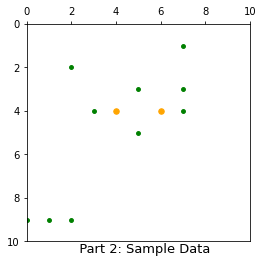

In [4]:
def solve2(board):
    return solve(board, True)

check(solve2(sampleBoard2 := Board(_sample)), 12)
sampleBoard2.plot(False, "Part 2: Sample Data")

Part 2 Result: 18423


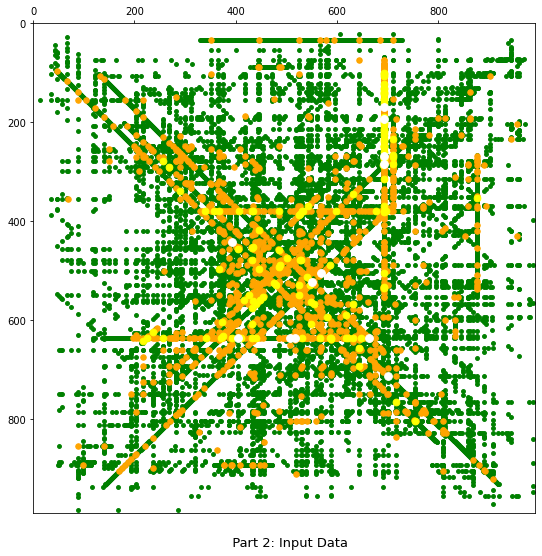

In [5]:
check2(solve2(inputBoard2 := Board(_input)))
inputBoard2.plot(True, "Part 2: Input Data")